In [2]:
!python --version


Python 3.7.6


In [3]:
#%matplotlib widget
import sys
sys.path.insert(0, '/u/ageorge/athena_fork_turb_box/athena_new_version/athena/vis/python')
import athena_read
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import scipy.stats as stats

#import cmasher as cmr

# Access rainforest colormap through CMasher or MPL
#cmap = cmr.rainforest                   # CMasher


## Plotting current v_turb vs time

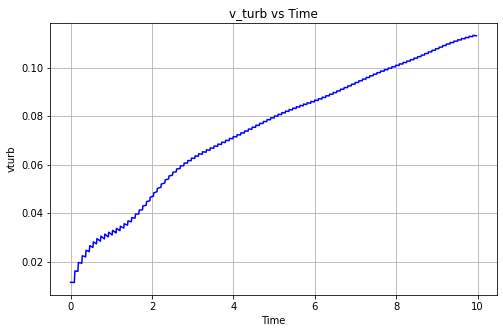

In [5]:
data = np.loadtxt("Turb_v2_init/Test_4_lowerturb/Turb.hst", comments="#")
time = data[:, 0]
mass = data[:, 2]

KE = data[:, 6] + data[:, 7] + data[:, 8]
vturb = np.sqrt(2 * KE / mass)


plt.figure(figsize=(8, 5))
plt.plot(time, vturb, color="blue")
plt.xlabel("Time")
plt.ylabel("vturb")
plt.title("v_turb vs Time")

plt.grid()
plt.savefig("vturb vs Time.png")
plt.show()



## Plotting Mach number vs time

In [5]:
file_names = sorted(glob.glob("Turb_v2_init/Test_4/*.athdf"))
gamma = 1.666666666667
vturbs = []
cs = []


for file in tqdm(file_names):
    if "out2" in file:
        data = athena_read.athdf(file)
        pressure = np.mean(data["press"])
        rho = np.mean(data["rho"])
        cs.append(np.sqrt(gamma * pressure / rho))

        velx = data['vel1']
        vely = data['vel2']
        velz = data['vel3']
        velx_mean = np.mean(velx)
        vely_mean = np.mean(vely)
        velz_mean = np.mean(velz)

        velx_prime = velx - velx_mean
        vely_prime = vely - vely_mean
        velz_prime = velz - velz_mean

        vturb = np.sqrt(np.mean(velx_prime**2 + vely_prime**2 + velz_prime**2 ))
        vturbs.append(vturb)
    else:
        pass
    



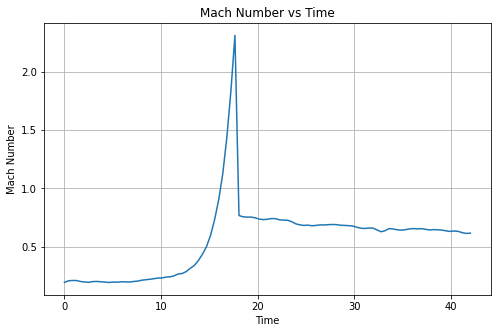

In [6]:
vturbs = np.array(vturbs)
cs = np.array(cs)

Mach_number = vturbs/cs
times = np.linspace(0, 42, 101)

plt.figure(figsize=(8, 5))
plt.plot(times, Mach_number)
plt.xlabel("Time")
plt.ylabel("Mach Number")
plt.title("Mach Number vs Time")

plt.grid()
plt.savefig("Mach number vs Time.png")
plt.show()


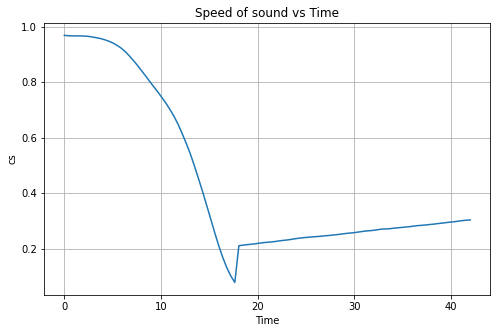

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(times, cs)
plt.xlabel("Time")
plt.ylabel("cs")
plt.title("Speed of sound vs Time")

plt.grid()
plt.savefig("cs vs Time.png")
plt.show()


## Plotting Temperature vs time

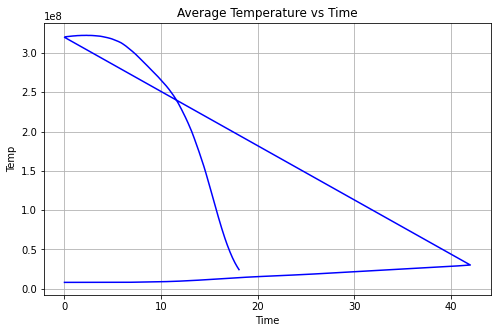

In [8]:
data = np.loadtxt("Turb_v2_init/Test_4/Turb.hst", comments="#")
time = data[:, 0]
temp = data[:,16]/64**3

plt.figure(figsize=(8, 5))
plt.plot(time, temp, color="blue")
plt.xlabel("Time")
plt.ylabel("Temp")
plt.title("Average Temperature vs Time")

plt.grid()
plt.savefig("Temp vs Time.png")
plt.show()
plt.close()


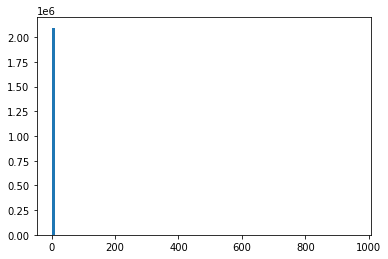

In [9]:
data = athena_read.athdf('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_4/Turb.out2.00005.athdf')
#data['rho'].shape
#plt.imshow(data['press'][:,:,0])
plt.hist(data['rho'].flatten(), bins = 100)
plt.show()

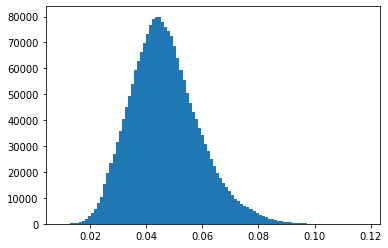

In [10]:
data = athena_read.athdf('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_4/Turb.out2.00085.athdf')
#data['rho'].shape
press = data['press']
#plt.imshow(data['press'][:,:,0])
plt.hist(press.flatten(), bins = 100)#np.logspace(-5,1, 1000))
#plt.xscale('log')
#plt.yscale('log')
plt.show()

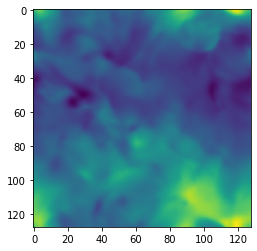

In [10]:
file_names = sorted(glob.glob("Turb_v2_init/Test_4_lowerturb/*.athdf"))

fig, ax = plt.subplots()
images = []


for file in tqdm(file_names[:]):
    if "out2" in file:
        rho = athena_read.athdf(file)["press"]
        image = ax.imshow(rho[:,:,64], cmap="viridis", animated=True)
        images.append([image])
    else:
        pass

ani = animation.ArtistAnimation(fig = fig, artists = images, interval = 150, blit = True )

ani.save('Test_4_lowerturb_press.mp4')

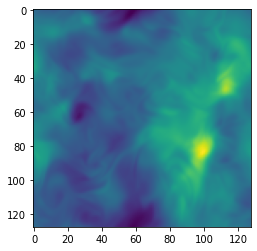

In [12]:
rho = athena_read.athdf("Turb_v2_init/Test_4/Turb.out2.00010.athdf")["rho"]
plt.imshow(rho[:,:,64], cmap="viridis", animated=True)
plt.show()

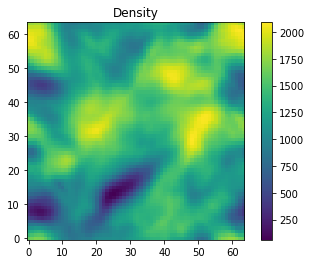

In [12]:
file_names = sorted(glob.glob("Turb_v2_init/Test_5_higherT/*.athdf"))

fig, ax = plt.subplots()
images = []
i = 0
for file in tqdm(file_names):
    if "out2" in file:
        rho = athena_read.athdf(file)["rho"]
        rho_proj = np.sum(rho, axis=2)
        
        image = ax.imshow(rho_proj, cmap="viridis", animated=True, origin="lower")
        #plt.savefig(f"Snapshots/Test_4_lowerturb_rho_proj/{i}.png")
        images.append([image])

        i+=1

ax.set_title("Density")

cbar = plt.colorbar(images[0][0], ax=ax)
#cbar.set_label("Projected Density")

ani = animation.ArtistAnimation(fig, images, interval=150, blit=True)
ani.save('Test_5_higherT_rho_proj.mp4', fps=10, dpi=150)

plt.show()